# Optimization Using Gradient Descent in Two Variables

In this lab, you will implement and visualize the gradient descent method optimizing some functions in two variables. You will have a chance to experiment with the initial parameters, and investigate the results and limitations of the method.

# Table of Contents

- [ 1 - Function with One Global Minimum](#1)
- [ 2 - Function with Multiple Minima](#2)

## Packages

Run the following cell to load the packages you'll need.

In [9]:
import numpy as np
import matplotlib.pyplot as plt
# Some functions defined specifically for this notebook.
from w2_tools import (plot_f_cont_and_surf, gradient_descent_two_variables, 
                      f_example_3, dfdx_example_3, dfdy_example_3, 
                      f_example_4, dfdx_example_4, dfdy_example_4)
# Magic command to make matplotlib plots interactive.
%matplotlib widget

<a name='1'></a>
## 1 - Function with One Global Minimum

Let's explore a simple example of a function in two variables $f\left(x, y\right)$ with one global minimum. Such a function was discussed in the videos, it is predefined and uploaded into this notebook as `f_example_3` with its partial derivatives `dfdx_example_3` and `dfdy_example_3`. At this stage, you do not need to worry about the exact expression for that function and its partial derivatives, so you can focus on the implementation of gradient descent and the choice of the related parameters. Run the following cell to plot the function.

(<Figure size 1000x500 with 2 Axes>,
 <Axes: xlabel='$x$', ylabel='$y$'>,
 <Axes3D: xlabel='$x$', ylabel='$y$', zlabel='$f$'>)

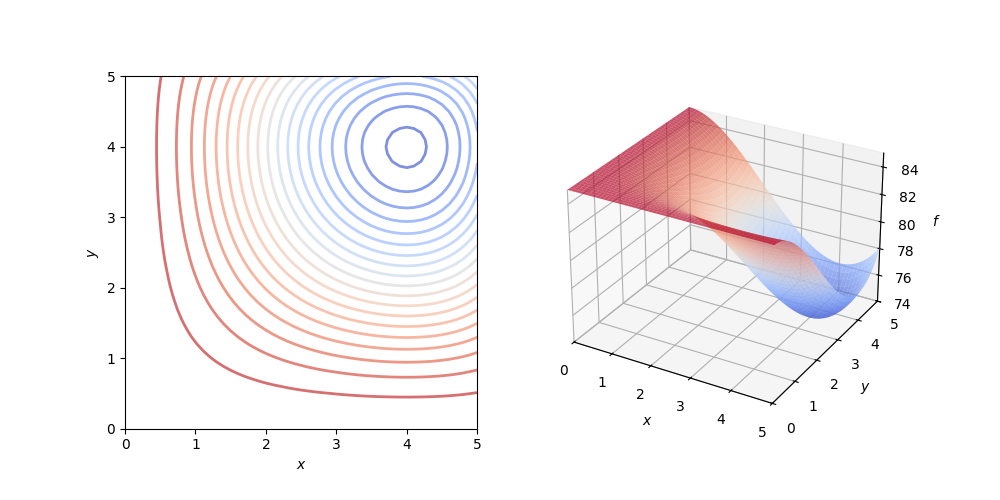

In [10]:
plot_f_cont_and_surf([0, 5], [0, 5], [74, 85], f_example_3, cmap='coolwarm', view={'azim':-60,'elev':28})

To find the minimum, you can implement gradient descent starting from the initial point $\left(x_0, y_0\right)$ and making steps iteration by iteration using the following equations:


$$x_1 = x_0 - \alpha \frac{\partial f}{\partial x}(x_0, y_0),$$ 
$$y_1 = y_0 - \alpha \frac{\partial f}{\partial y}(x_0, y_0),\tag{1}$$

where $\alpha>0$ is a learning rate. Number of iterations is also a parameter. The method is implemented with the following code:

In [11]:
def gradient_descent(dfdx, dfdy, x, y, learning_rate = 0.1, num_iterations = 100):
    for iteration in range(num_iterations):
        x, y = x - learning_rate * dfdx(x, y), y - learning_rate * dfdy(x, y)
    return x, y

Now to optimize the function, set up the parameters `num_iterations`, `learning_rate`, `x_initial`, `y_initial` and run gradient descent:

In [12]:
num_iterations = 30; learning_rate = 0.25; x_initial = 0.5; y_initial = 0.6
print("Gradient descent result: x_min, y_min =", 
      gradient_descent(dfdx_example_3, dfdy_example_3, x_initial, y_initial, learning_rate, num_iterations)) 

Gradient descent result: x_min, y_min = (4.0, 4.0)


You can see the visualization running the following code. Note that gradient descent in two variables performs steps on the plane, in a direction opposite to the gradient vector $\begin{bmatrix}\frac{\partial f}{\partial x}(x_0, y_0) \\ \frac{\partial f}{\partial y}(x_0, y_0)\end{bmatrix}$ with the learning rate $\alpha$ as a scaling factor.

By uncommenting different lines you can experiment with various sets of the parameter values and corresponding results. At the end of the animation, you can also click on the contour plot to choose the initial point and restart the animation automatically.

Run a few experiments and try to explain what is actually happening in each of the cases.

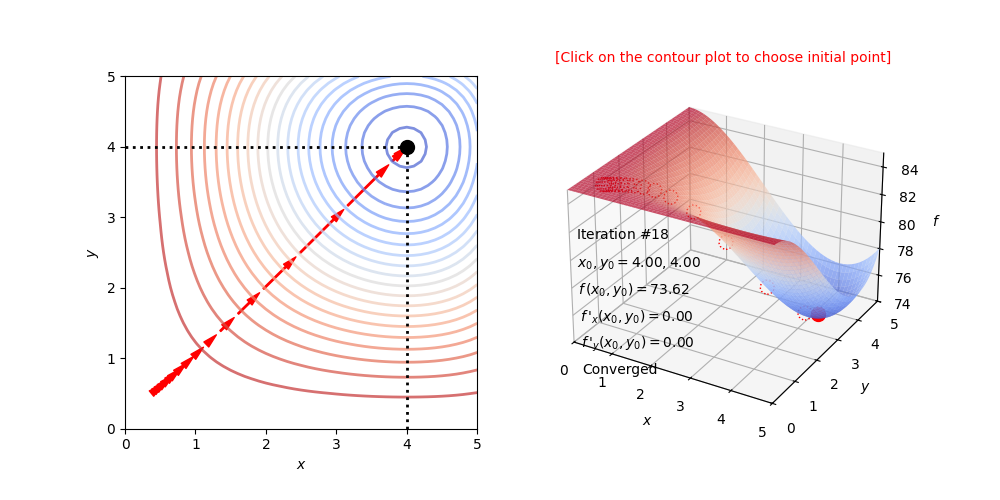

In [13]:
num_iterations = 20; learning_rate = 0.25; x_initial = 0.5; y_initial = 0.6
# num_iterations = 20; learning_rate = 0.5; x_initial = 0.5; y_initial = 0.6
# num_iterations = 20; learning_rate = 0.15; x_initial = 0.5; y_initial = 0.6
# num_iterations = 20; learning_rate = 0.15; x_initial = 3.5; y_initial = 3.6

gd_example_3 = gradient_descent_two_variables([0, 5], [0, 5], [74, 85], 
                                              f_example_3, dfdx_example_3, dfdy_example_3, 
                                              gradient_descent, num_iterations, learning_rate, 
                                              x_initial, y_initial, 
                                              [0.1, 0.1, 81.5], 2, [4, 1, 171], 
                                              cmap='coolwarm', view={'azim':-60,'elev':28})

<a name='2'></a>
## 2 - Function with Multiple Minima

Let's investigate a more complicated case of a function, which was also shown in the videos:

(<Figure size 1000x500 with 2 Axes>,
 <Axes: xlabel='$x$', ylabel='$y$'>,
 <Axes3D: xlabel='$x$', ylabel='$y$', zlabel='$f$'>)

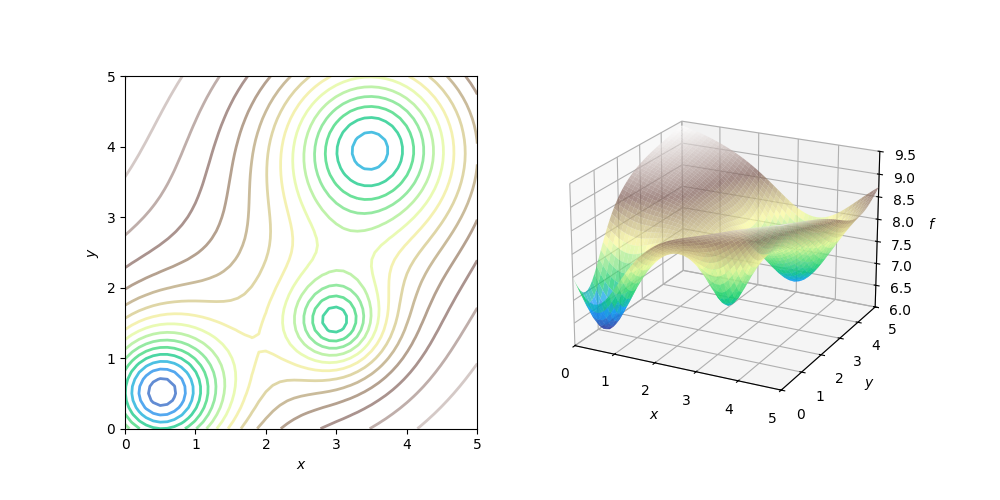

In [14]:
plot_f_cont_and_surf([0, 5], [0, 5], [6, 9.5], f_example_4, cmap='terrain', view={'azim':-63,'elev':21})

You can find its global minimum point by using gradient descent with the following parameters:

In [15]:
num_iterations = 100; learning_rate = 0.2; x_initial = 0.5; y_initial = 3

print("Gradient descent result: x_min, y_min =", 
      gradient_descent(dfdx_example_4, dfdy_example_4, x_initial, y_initial, learning_rate, num_iterations)) 

Gradient descent result: x_min, y_min = (0.5230322579358745, 0.5169891562802605)


However, the shape of the surface is much more complicated and not every initial point will bring you to the global minimum of this surface. Use the following code to explore various sets of parameters and the results of gradient descent.

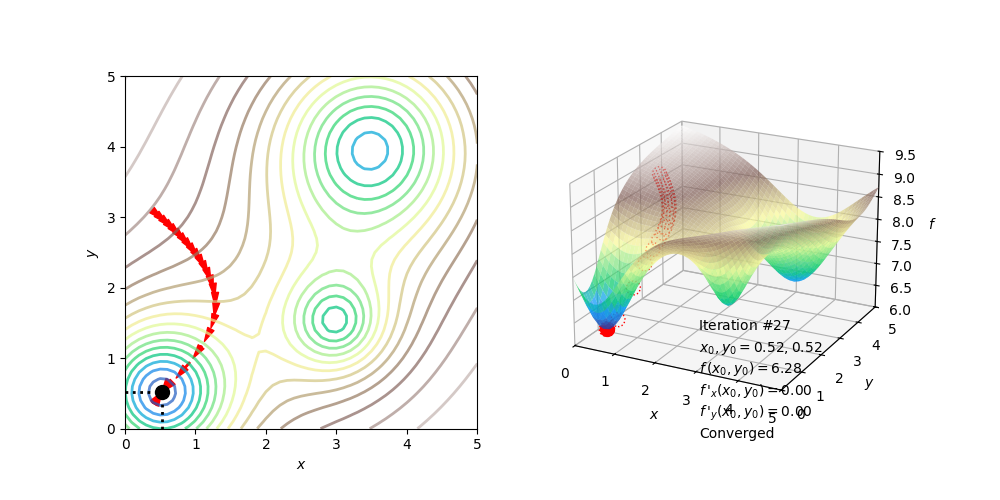

In [16]:
# Converges to the global minimum point.
num_iterations = 30; learning_rate = 0.2; x_initial = 0.5; y_initial = 3
# Converges to a local minimum point.
# num_iterations = 20; learning_rate = 0.2; x_initial = 2; y_initial = 3
# Converges to another local minimum point.
# num_iterations = 20; learning_rate = 0.2; x_initial = 4; y_initial = 0.5

gd_example_4 = gradient_descent_two_variables([0, 5], [0, 5], [6, 9.5], 
                                              f_example_4, dfdx_example_4, dfdy_example_4, 
                                              gradient_descent, num_iterations, learning_rate, 
                                              x_initial, y_initial, 
                                              [2, 2, 6], 0.5, [2, 1, 63], 
                                              cmap='terrain', view={'azim':-63,'elev':21})

You had a chance to experience the robustness and limitations of the gradient descent methods for a function in two variables. 